In [47]:
# import the necessary libraries
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import spotipy.util as util
import base64
import requests
import string
import random
from statistics import mean
from collections import Counter
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np
import matplotlib.cm as cm

In [2]:
# create genre teams, so that there is no request limit error during the process
genres1 = ['rock', 'classical', 'dance']
genres2 = ['electronic', 'folk', 'hip-hop']
genres3 = ['rap', 'jazz', 'blues'] 
genres4 = ['metal', 'pop', 'punk']
genres5 = ['soul', 'reggae', 'country']
genres6 = ['indie', 'alternative']
genres7 = ['latin', 'r&b']

In [3]:
# spotify api credentials
cid = 'cb6363e3cc3648c095d7a3059583f2e6'
secret = 'e07a5393025d42e5bad864295ca0b3b8'

In [4]:
# authenticate the credentials through spotify
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
sp2 = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

#### Creation of the Main Big Dataset

In [ ]:
# create lists where the song data will be stored during the process
artist_name = []
artist_id = []
track_name = []
popularity = []
track_id = []
checkers = []
dnc = []
nrg = []
ld = []
spc = []
acs = []
ins = []
lv = []
vln = []
tmp = []
initgenre = []

In [ ]:
# the main process for the creation of the big spotify dataset. Request for 80 playlists (and their tracks) for every genre.
# possible same missfunction as the one in the medium and small dataset creation's code block (later on in the notebook)
def datasetCreator(genres):
    global artist_name
    global artist_id
    global track_name
    global popularity
    global track_id
    global checkers
    global dnc
    global nrg
    global ld
    global spc
    global acs
    global ins
    global lv
    global vln
    global tmp
    global initgenre
    for gnr in genres:
        for j in range(0, 80):
            try:
                playlist_results = sp.search(q=gnr, type='playlist', market='US', limit=1, offset=j)
                plist = playlist_results['playlists']['items'][0]
            except:
                print("Error occurred at the playlist extraction. Continuing with", len(artist_id), "total elements.")
            try:
                plt = 'spotify:playlist:' + plist['id']
                plst = sp2.playlist(plt)
                for i, item in enumerate(plst['tracks']['items']):
                    booler = 0
                    checkifreached = 0
                    t = item['track']
                    if t['artists'][0]['name'] != None:
                        nn = ''.join(t['artists'][0]['name'])
                        nn = nn.lower()
                        artist_name.append(nn)
                    else:
                        artist_name.append("")
                    ider = t['artists'][0]['id']
                    artist_id.append(ider)
                    if ider != None:
                        urn = 'spotify:artist:' + ider
                        artist = sp2.artist(urn)
                        ge = ""
                        # sto ge prostheteis keno sthn arxh kai sto telos, wste na kaneis swsto elegxo meta gia to kathe genre
                        for genre in artist['genres']:
                            prep = genre.lower()
                            prep = prep.replace(" ", "")
                            ge = ge + " " + prep
                        ge = ge + " "
                        checkers.append(ge)
                    else:
                        checkers.append('')
                    tnn = ''.join(t['name'])
                    tnn = tnn.lower()
                    track_name.append(tnn)
                    track_id.append(t['id'])
                    ttt = t['id']
                    gggenre = gnr.lower()
                    gggenre = gggenre.replace(" ", "")
                    initgenre.append(gggenre)
                    checkifreached = 1
                    features = sp2.audio_features(tracks=[ttt])
                    if features[0] != None:
                        booler = 1
                        dnc.append(features[0]['danceability'])
                        nrg.append(features[0]['energy'])
                        ld.append(features[0]['loudness'])
                        spc.append(features[0]['speechiness'])
                        acs.append(features[0]['acousticness'])
                        ins.append(features[0]['instrumentalness'])
                        lv.append(features[0]['liveness'])
                        vln.append(features[0]['valence'])
                        tmp.append(features[0]['tempo'])
                    else:
                        booler = 1
                        dnc.append(mean(dnc))
                        nrg.append(mean(nrg))
                        ld.append(mean(ld))
                        spc.append(mean(spc))
                        acs.append(mean(acs))
                        ins.append(mean(ins))
                        lv.append(mean(lv))
                        vln.append(mean(vln))
                        tmp.append(mean(tmp))
            except:
                print("An error occured later on. The progress is being continued with", len(artist_id), "total elements.")
                if booler == 0 and checkifreached == 1:
                    dnc.append(mean(dnc))
                    nrg.append(mean(nrg))
                    ld.append(mean(ld))
                    spc.append(mean(spc))
                    acs.append(mean(acs))
                    ins.append(mean(ins))
                    lv.append(mean(lv))
                    vln.append(mean(vln))
                    tmp.append(mean(tmp))
                continue
        

In [ ]:
# call the function for the first three genre teams
datasetCreator(genres1)
print("Done with set 1.", len(artist_id), "tracks so far.")
datasetCreator(genres2)
print("Done with set 2.", len(artist_id), "tracks so far.")
datasetCreator(genres3)
print("Done with set 3.", len(artist_id), "tracks so far.")

In [ ]:
# call the function for the next three genre teams
datasetCreator(genres4)
print("Done with set 4.", len(artist_id), "tracks so far.")
datasetCreator(genres5)
print("Done with set 5.", len(artist_id), "tracks so far.")
datasetCreator(genres6)
print("Done with set 6.", len(artist_id), "tracks so far.")

In [ ]:
# call the function for the final genre team
datasetCreator(genres7)
print("Done with set 7.", len(artist_id), "tracks.")

In [ ]:
# validate that all the lists have the same length
print(len(track_id))
print(len(track_name))
print(len(artist_name))
print(len(artist_id))
print(len(checkers))
print(len(initgenre))
print(len(dnc))
print(len(nrg))
print(len(ld))
print(len(spc))
print(len(acs))
print(len(ins))
print(len(lv))
print(len(vln))
print(len(tmp))

In [ ]:
# create a dataframe with all the data collected
dict = {'trackid': track_id, 'trackname': track_name, 'artist': artist_name, 'artistid': artist_id, "genres": checkers, "main_genre": initgenre, "danceability": dnc, "energy": nrg, "loudness": ld, "speechness": spc, "acousticness": acs, "instrumentalness": ins, "liveness": lv, "valence": vln, "tempo": tmp}
df = pd.DataFrame(dict)
print(len(df))

In [ ]:
# check the distribution of tracks for every genre
print(Counter(spis['main_genre']))

In [ ]:
# save the dataframe, as the main big dataset
df.to_csv('generatedDatasets/spotifyDatasetBig.csv', index=False)

#### Creation of Music Features' Diagrams

In [22]:
# load the big main dataset
spis = pd.read_csv('generatedDatasets/spotifyDatasetBig.csv', low_memory=False)
print(len(spis))
spis = spis.dropna()
print(len(spis))
spis = spis.drop_duplicates()
print(len(spis))

114404
114351
84307


In [24]:
spis.head()

,trackid,trackname,artist,artistid,genres,main_genre,danceability,energy,loudness,speechness,acousticness,instrumentalness,liveness,valence,tempo
0,0hCB0YR03f6AmQaHbwWDe8,whole lotta love - 1990 remaster,led zeppelin,36QJpDe2go2KgaRleHCDTp,albumrock classicrock hardrock rock,rock,0.412,0.902,-11.600,0.4050,0.04840,0.131000,0.4050,0.422,89.740
1,2aoo2jlRnM3A0NyLQqMN2f,all along the watchtower,jimi hendrix,776Uo845nYHJpNaStv1Ds4,acidrock albumrock bluesrock classicrock hard...,rock,0.438,0.805,-6.237,0.0624,0.00255,0.000057,0.0842,0.564,113.253
2,08mG3Y1vljYA6bvDt4Wqkj,back in black,ac/dc,711MCceyCBcFnzjGY4Q7Un,albumrock australianrock hardrock rock,rock,0.310,0.700,-5.678,0.0470,0.01100,0.009650,0.0828,0.763,188.386
3,1RJeiAIwR9pZBgJA8ndZLL,"paint it, black - mono",the rolling stones,22bE4uQ6baNwSHPVcDxLCe,britishinvasion classicrock rock,rock,0.505,0.836,-7.384,0.1010,0.01030,0.077100,0.2950,0.764,159.669
4,66lOpKgTyFjOrac4S1s94g,rebel rebel - 1999 remaster,david bowie,0oSGxfWSnnOXhD2fKuz2Gy,albumrock artrock classicrock dancerock glamr...,rock,0.676,0.920,-7.960,0.0435,0.00101,0.000009,0.2480,0.624,126.341


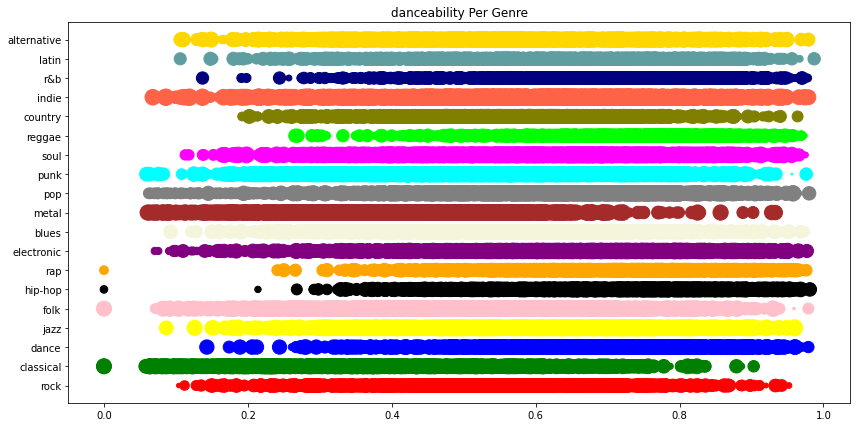

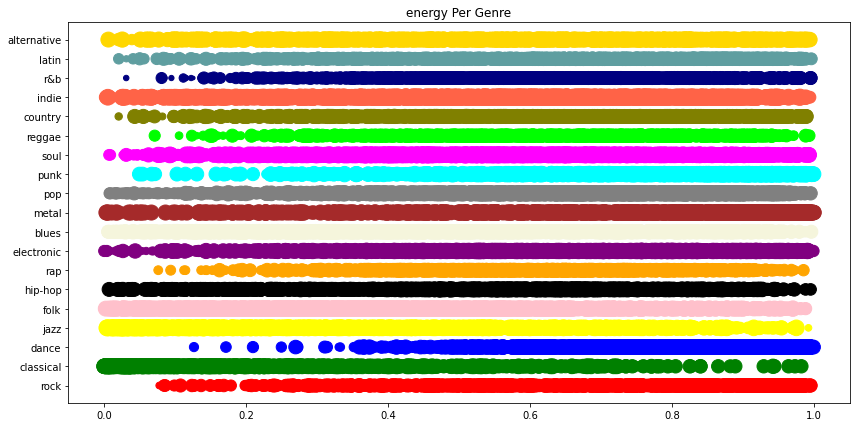

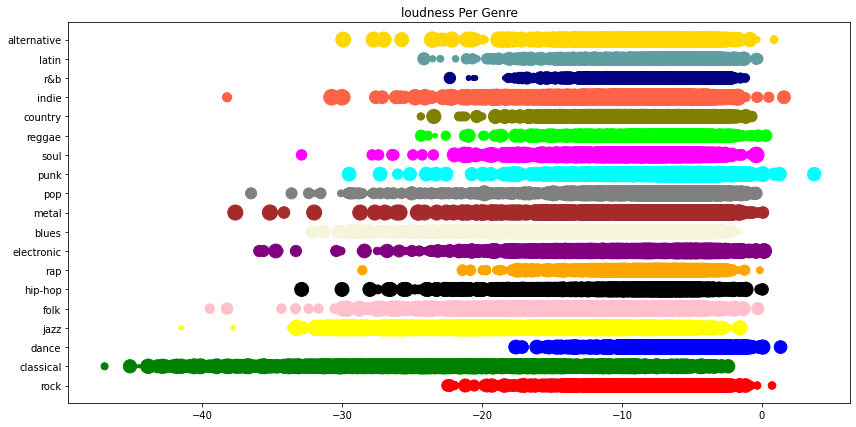

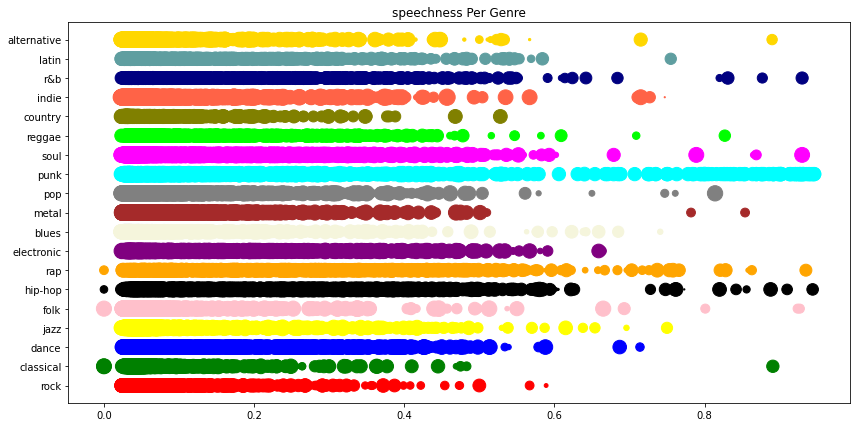

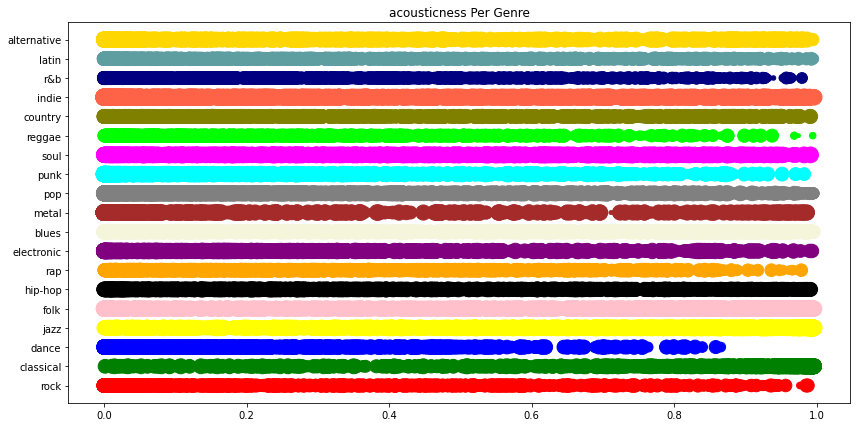

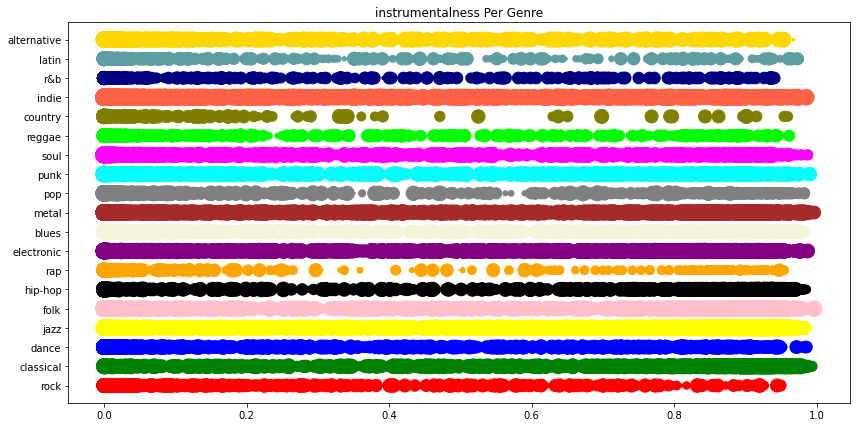

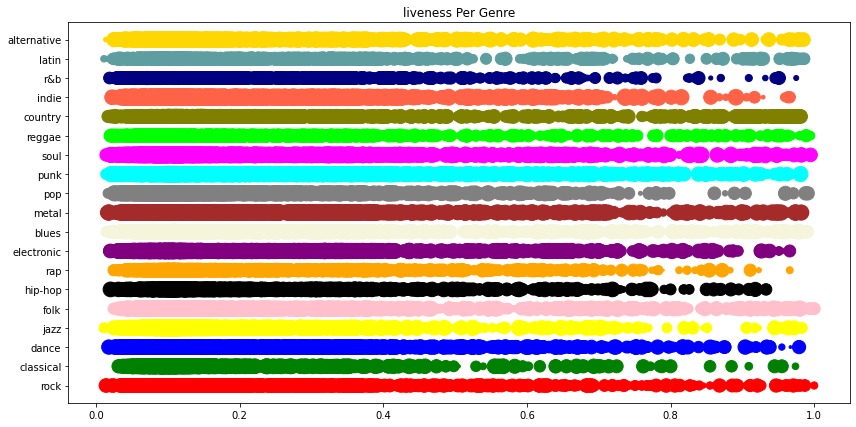

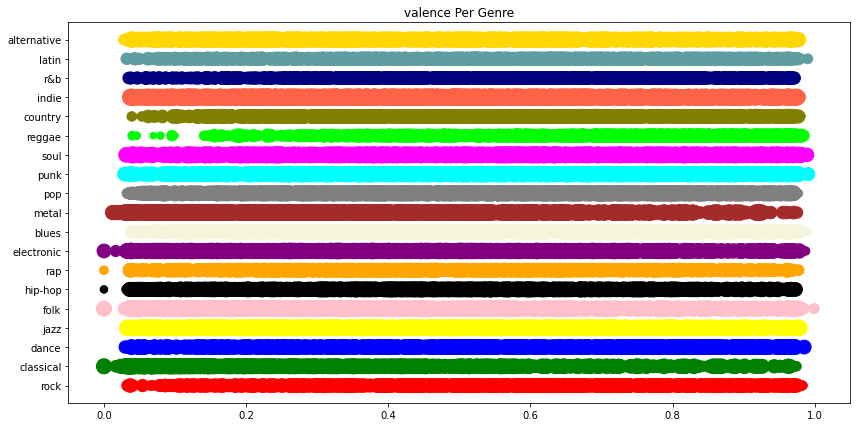

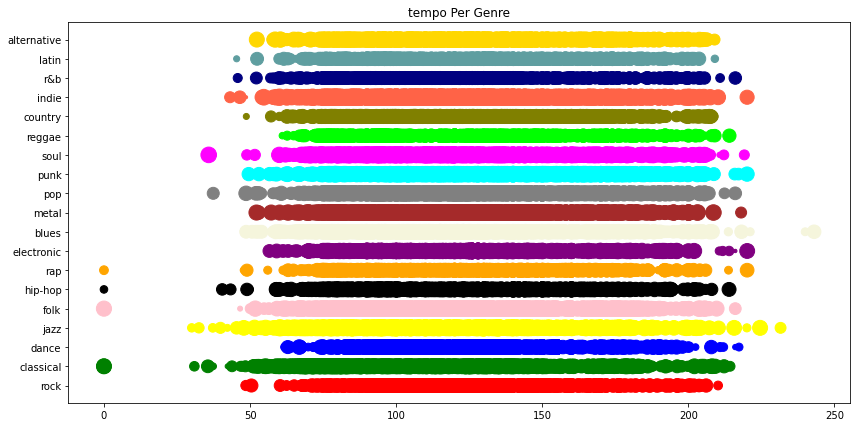

In [99]:
# generate plots for the audio features and each genre
gnrs = ['rock', 'classical', 'dance', 'jazz', 'folk', 'hip-hop', 'rap', 'electronic', 'blues', 'metal', 'pop', 'punk', 'soul', 'reggae', 'country', 'indie', 'r&b', 'latin', 'alternative']
colors = np.array(["red", "green", "blue", "yellow", "pink", "black", "orange", "purple", "beige", "brown", "gray", "cyan", "magenta", "lime", "olive", "tomato", "navy", "cadetblue", "gold"])
features = ['danceability','energy','loudness','speechness','acousticness','instrumentalness','liveness','valence','tempo']

for feature in features:
    plt.figure(figsize=(14,7))
    ind = 0
    for gnr in gnrs:
        sizes = s_linear = [0.05*n for n in range(len(spis.loc[spis['main_genre'] == gnr, feature]))]
        plt.scatter(spis.loc[spis['main_genre'] == gnr, feature], spis.loc[spis['main_genre'] == gnr, 'main_genre'], color=colors[ind], s=sizes)
        ind = ind + 1
    ttl = feature + " Per Genre"
    plt.title(ttl)
    fname = feature + "plt.png"
    plt.savefig('plots/'+fname)
    plt.show()

#### Creation of "Med" and "Small" Sized Datasets

In [ ]:
artist_name = []
artist_id = []
track_name = []
popularity = []
track_id = []
checkers = []
dnc = []
nrg = []
ld = []
spc = []
acs = []
ins = []
lv = []
vln = []
tmp = []
initgenre = []
ONCE = [1]

In [ ]:
gnrs = ['rock', 'classical', 'dance', 'electronic', 'folk', 'hip-hop', 'rap', 'jazz', 'blues', 'metal', 'pop', 'punk', 'soul', 'reggae', 'country', 'indie', 'alternative', 'latin', 'r&b']

In [ ]:
# sometimes it misses some info, so you manualy find them and correct them. you have to check and fix that. This means that
# some lists do not get the proper value during loop, so the whole thing breaks (for example, an artist ends up with different genres than his).
# only change needed between med and small datasets is 200 upper range for med and 50 for small
counter = 0
for gnr in gnrs:
    print(len(artist_id))
    for i in range(0,50):
        #idcheck = 0
        #while idcheck == 0:
        try:
            phrase = 'genre:' + gnr
            songg = sp.search(q=phrase, type='track', market='US', limit=1, offset=i)
        except:
            print("Error occurred. Keep working. ", len(artist_id) )
            #iddd = songg['tracks']['items'][0]['id']
            #if iddd not in ttrack_id:
            #    idcheck = 1
        for i, t in enumerate(ONCE):
            try:
                for i, item in enumerate(songg['tracks']['items']):
                    booler = 0
                    checkifreached = 0
                    t = item
                    if t['artists'][0]['name'] != None:
                        nn = ''.join(t['artists'][0]['name'])
                        nn = nn.lower()
                        artist_name.append(nn)
                    else:
                        artist_name.append("")
                    ider = t['artists'][0]['id']
                    artist_id.append(ider)
                    if ider != None:
                        urn = 'spotify:artist:' + ider
                        artist = sp2.artist(urn)
                        ge = ""
                        # sto ge prostheteis keno sthn arxh kai sto telos, wste na kaneis swsto elegxo meta gia to kathe genre
                        for genre in artist['genres']:
                            prep = genre.lower()
                            prep = prep.replace(" ", "")
                            ge = ge + " " + prep
                        ge = ge + " "
                        checkers.append(ge)
                    else:
                        checkers.append('')
                    tnn = ''.join(t['name'])
                    tnn = tnn.lower()
                    track_name.append(tnn)
                    track_id.append(t['id'])
                    ttt = t['id']
                    gggenre = gnr.lower()
                    gggenre = gggenre.replace(" ", "")
                    initgenre.append(gggenre)
                    checkifreached = 1
                    features = sp2.audio_features(tracks=[ttt])
                    if features[0] != None:
                        booler = 1
                        dnc.append(features[0]['danceability'])
                        nrg.append(features[0]['energy'])
                        ld.append(features[0]['loudness'])
                        spc.append(features[0]['speechiness'])
                        acs.append(features[0]['acousticness'])
                        ins.append(features[0]['instrumentalness'])
                        lv.append(features[0]['liveness'])
                        vln.append(features[0]['valence'])
                        tmp.append(features[0]['tempo'])
                    else:
                        booler = 1
                        dnc.append(mean(dnc))
                        nrg.append(mean(nrg))
                        ld.append(mean(ld))
                        spc.append(mean(spc))
                        acs.append(mean(acs))
                        ins.append(mean(ins))
                        lv.append(mean(lv))
                        vln.append(mean(vln))
                        tmp.append(mean(tmp))
            except Exception as e:
                '''if(len(artist_id) > len(dnc)):
                    artist_id.pop()
                if(len(artist_name) > len(dnc)):
                    artist_name.pop()'''
                print("An error occured,", e, ". The progress is being continued with", len(artist_id), "total elements.")
                if booler == 0 and checkifreached == 1:
                    dnc.append(mean(dnc))
                    nrg.append(mean(nrg))
                    ld.append(mean(ld))
                    spc.append(mean(spc))
                    acs.append(mean(acs))
                    ins.append(mean(ins))
                    lv.append(mean(lv))
                    vln.append(mean(vln))
                    tmp.append(mean(tmp))
                continue
    counter = counter + 1

In [ ]:
dict = {'trackid': track_id, 'trackname': track_name, 'artist': artist_name, 'artistid': artist_id, "genres": checkers, "main_genre": initgenre, "danceability": dnc, "energy": nrg, "loudness": ld, "speechness": spc, "acousticness": acs, "instrumentalness": ins, "liveness": lv, "valence": vln, "tempo": tmp}
df = pd.DataFrame(dict)
print(len(df))

In [ ]:
#df.to_csv('generatedDatasets/spotifyDatasetMed.csv', index=False)
df.to_csv('generatedDatasets/spotifyDatasetSmall.csv', index=False)

In [ ]:
from collections import Counter
print(Counter(initgenre))

#### Similar Artists & Genres with Artists Datasets (only med 'n' small datasets)

In [ ]:
# initialize lists for the similar artists session
artid = list(spis['artistid'])
artname = list(spis['artist'])
ges = list(spis['genres'])

In [ ]:
# adding the similar artists
# takes A LOT of time
# minor mistake detected -> it forgets to draw genres for the main artist in each loop and save them along with the others. It only does so for his/her similar ones.
print("starting with", len(artname), "artists.")
c = 0
cc = 0
for oneid in artid:
    try:
        if cc == 10:
            print("Progress:", c, ". Artists now:", len(artname))
            cc = 0
        similars = sp2.artist_related_artists(oneid)
        for i, t in enumerate(similars['artists']):
            arname = t['name'].lower()
            ider = t['id']
            urn = 'spotify:artist:' + ider
            artist = sp2.artist(urn)
            ge = ""
            for genre in artist['genres']:
                prep = genre.lower()
                prep = prep.replace(" ", "")
                ge = ge + " " + prep
            artname.append(arname)
            ges.append(ge)
        c = c + 1
        cc = cc + 1
    except:
        print("error occurred, everything keeps working.", c)

In [ ]:
dict = {'artist': artname, "genres": ges}
bass = pd.DataFrame(dict)
# save the generated dataset
bass.to_csv("generatedDatasets/artistNgenresMed.csv", index=False)
#bass.to_csv("generatedDatasets/artistNgenresSmall.csv", index=False)

In [16]:
bass = pd.read_csv("generatedDatasets/artistNgenresMed.csv", low_memory=False)
#bass = pd.read_csv("generatedDatasets/artistNgenresSmall.csv", low_memory=False)

In [17]:
print(len(bass))
bass = bass.dropna()
print(len(bass))

1682737
1581546


In [18]:
mainer = pd.DataFrame (columns = ['genre','artists'])

In [19]:
# generate the enriched dataset with genres and their artists
print("Target:", len(bass))
cc = 0
for index, row in bass.iterrows():
    if cc == 100:
        print(index)
        cc = 0
    try:
        rowgenres = row[1].split(" ")
        for genre in rowgenres:
            #print(genre)
            if genre in mainer.values:
                ider = mainer[mainer['genre']==genre].index.values.astype(int)
                existing = ''.join(mainer['artists'][ider])
                # following line in order to remove punctuation
                existing = existing.translate(str.maketrans('', '', string.punctuation))
                ar = row[0].lower()
                ar = ar.replace(" ", "")
                if type(existing) == float :
                    mainer.loc[ider,'artists'] = ar
                else:
                    if ar in existing:
                        continue
                    else:
                        new = existing + ' ' + ar
                        mainer.loc[ider,'artists'] = new
            else:
                mainer.loc[index,'genre'] = genre
                ar = row[0].lower()
                ar = ar.replace(" ", "")
                mainer.loc[index,'artists'] = ar
    except Exception as e:
        print("Error occurred", e, ". Continuing.")
    cc = cc + 1

Target: 1581546
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200


133794
133894
133994
134094
134194
134295
134395
134495
134595
134695
134796
134897
134997
135097
135199
135299
135401
135504
135604
135705
135805
135906
136006
136106
136208
136308
136408
136508
136608
136708
136814
136914
137014
137115
137215
137318
137420
137520
137620
137720
137820
137921
138023
138123
138223
138323
138423
138523
138623
138723
138823
138923
139023
139123
139223
139323
139423
139523
139623
139723
139824
139924
140024
140124
140224
140324
140425
140525
140625
140725
140827
140927
141027
141127
141227
141327
141427
141527
141627
141727
141827
141927
142027
142128
142229
142329
142430
142531
142631
142731
142831
142931
143031
143131
143231
143331
143431
143531
143635
143735
143836
143939
144040
144148
144248
144348
144448
144549
144663
144765
144866
144978
145083
145186
145287
145388
145488
145593
145694
145794
145894
145994
146094
146194
146294
146394
146494
146595
146696
146799
146903
147009
147140
147242
147354
147469
147592
147704
147805
147905
148005
148106
148206

261802
261902
262002
262102
262203
262303
262403
262504
262604
262714
262814
262934
263034
263142
263252
263357
263462
263565
263672
263772
263872
263985
264103
264249
264393
264498
264625
264726
264828
264935
265037
265141
265241
265351
265453
265554
265668
265772
265872
265973
266073
266173
266273
266373
266474
266574
266674
266774
266875
266975
267076
267176
267276
267377
267479
267579
267682
267783
267886
267988
268089
268189
268289
268389
268489
268590
268690
268790
268892
268998
269100
269206
269308
269410
269512
269617
269717
269818
269919
270022
270122
270223
270323
270427
270528
270628
270729
270829
270931
271031
271131
271231
271331
271433
271534
271647
271750
271859
272005
272107
272209
272355
272465
272565
272682
272782
272885
272988
273088
273192
273295
273416
273516
273621
273721
273821
273925
274025
274125
274225
274345
274460
274561
274661
274761
274861
274965
275065
275165
275267
275381
275495
275605
275708
275811
275918
276018
276137
276237
276354
276454
276554
276655

395013
395123
395237
395337
395437
395565
395696
395796
395928
396034
396148
396269
396381
396492
396594
396708
396810
396926
397040
397141
397253
397359
397459
397559
397659
397759
397860
397960
398060
398160
398261
398361
398469
398610
398711
398825
398935
399037
399149
399249
399349
399453
399564
399673
399789
399893
399993
400117
400219
400329
400432
400534
400635
400745
400848
400949
401080
401195
401366
401475
401583
401729
401884
402029
402140
402246
402400
402504
402655
402756
402858
402962
403070
403172
403276
403379
403479
403581
403681
403781
403884
403984
404086
404188
404289
404389
404489
404589
404689
404789
404891
404991
405091
405191
405302
405408
405508
405608
405721
405828
405937
406062
406183
406283
406387
406514
406619
406720
406859
406976
407091
407215
407322
407428
407534
407638
407763
407866
407971
408078
408178
408278
408386
408489
408592
408699
408799
408915
409018
409127
409236
409348
409449
409561
409664
409765
409865
409965
410078
410184
410381
410538
410639

KeyboardInterrupt: 

In [ ]:
mainer.to_csv("generatedDatasets/forCosineLinearMed.csv", index=False)
#mainer.to_csv("generatedDatasets/forCosineLinearSmall.csv", index=False)